In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [114]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import twitter_credentials

In [115]:
auth = tweepy.OAuthHandler(twitter_credentials.TWITTER_CONSUMER_KEY,twitter_credentials.TWITTER_CONSUMER_KEY_SECRET)
auth.set_access_token(twitter_credentials.TWITTER_ACCESS_TOKEN,twitter_credentials.TWITTER_ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [112]:
from tweepy import Stream
from IPython import display
from collections import deque
import json

class MyListener(StreamListener):
    def __init__(self):
        super().__init__()
        self.list_of_tweets = deque([], maxlen=5)
        
    def on_data(self, data):
        try:
            tweet_text = json.loads(data)
            self.list_of_tweets.append(tweet_text)
            self.print_list_of_tweets()
            db.Twitter_Data.insert_one(tweet_text)
        except:
            None
          
    def on_error(self, status):
        print(status)

    def print_list_of_tweets(self):
        display.clear_output(wait=True)
        for index, tweet_text in enumerate(self.list_of_tweets):
            m='{}. {}\n\n'.format(index, tweet_text)
            print(m)        
            
twitter_stream = Stream(auth, MyListener(), tweet_mode='extended')
twitter_stream.filter(track=['bitcoin', 'XBT', 'ethereum', 'ETH', 'blockchain', '#HODL', '#crypto' 'OKEx', 'Binance'])

0. {'created_at': 'Thu May 23 19:47:08 +0000 2019', 'id': 1131647770488659969, 'id_str': '1131647770488659969', 'text': 'Ryan Kavanaugh’s Media Firm Secures $100 Million Investment for Crypto Project | Via Cointelegraph #bitcoin… https://t.co/JKfiRxirGZ', 'source': '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 930576551313371138, 'id_str': '930576551313371138', 'name': 'CoinStart - Starten met Bitcoin!', 'screen_name': 'CoinStartNL', 'location': 'Nederland', 'url': 'https://coinstart.nl', 'description': '#CoinstartNL is een cryptocurrency blog voor jou dagelijkse dosis #Bitcoin, #cryptocurrency & #Blockchain nieuws.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 224, 'friends_count': 301, 'listed_count': 3, 'favourites_count': 303, 'statuses_cou

KeyboardInterrupt: 

In [116]:
from pymongo import MongoClient
from pymongo import InsertOne, DeleteOne, ReplaceOne
from pprint import pprint
client = MongoClient()

In [117]:
client.list_database_names()

['admin', 'books', 'config', 'cryptocurrency', 'local', 'outings']

In [118]:
db = client.cryptocurrency

In [119]:
db.list_collection_names()

['Twitter_Data']

In [120]:
# db.create_collection('Twitter_Data')

In [121]:
collection = db.Twitter_Data

In [122]:
collection.count_documents({})

96741

In [12]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


SystemExit: 0

/anaconda3/envs/metis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [123]:
df_tweets = pd.DataFrame(list(collection.find({},)))
df_tweets.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,5cddd6d5fc4f0d82a2c73e41,NaN,None,Thu May 16 21:32:00 +0000 2019,NaN,"{'hashtags': [{'text': 'NEO', 'indices': [23, ...",NaN,NaN,0.0,False,...,0.0,0.0,False,{'created_at': 'Wed May 15 12:00:24 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @bitebtccom: 10,000 #NEO #Airdrop Follow, R...",1558042320100,False,"{'id': 1057647375819259904, 'id_str': '1057647...",NaN
1,5cddd6d5fc4f0d82a2c73e42,NaN,None,Thu May 16 21:32:00 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,...,0.0,0.0,False,{'created_at': 'Thu May 16 17:29:08 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CNBCFuturesNow: Bitcoin boom or bust? @See...,1558042320141,False,"{'id': 244627836, 'id_str': '244627836', 'name...",NaN
2,5cddd6d6fc4f0d82a2c73e43,NaN,None,Thu May 16 21:32:00 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'RT https://t.co/JyAi9gRMbY Evol...,0.0,False,...,0.0,0.0,False,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",RT https://t.co/JyAi9gRMbY Evolution de la mar...,1558042320954,True,"{'id': 896496284374372352, 'id_str': '89649628...",NaN
3,5cddd6d6fc4f0d82a2c73e44,NaN,None,Thu May 16 21:32:01 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,...,0.0,0.0,False,{'created_at': 'Thu May 16 20:52:33 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @CryptoMichNL: Isn't it great to have the v...,1558042321421,False,"{'id': 950858491392126976, 'id_str': '95085849...",NaN
4,5cddd6d6fc4f0d82a2c73e45,NaN,None,Thu May 16 21:32:01 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,...,0.0,0.0,False,{'created_at': 'Mon May 13 14:20:52 +0000 2019...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @sharesleuth: We've posted a new story deta...,1558042321563,False,"{'id': 842562191433723904, 'id_str': '84256219...",NaN


In [124]:
df_tweets.columns

Index(['_id', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'extended_tweet',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'limit', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'retweeted_status',
       'source', 'text', 'timestamp_ms', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')

In [125]:
df_text = df_tweets[['_id', 'lang', 'text', 'user']]
df_text.text.astype(str)
df_text.head()

,_id,lang,text,user
0,5cddd6d5fc4f0d82a2c73e41,en,"RT @bitebtccom: 10,000 #NEO #Airdrop Follow, R...","{'id': 1057647375819259904, 'id_str': '1057647..."
1,5cddd6d5fc4f0d82a2c73e42,en,RT @CNBCFuturesNow: Bitcoin boom or bust? @See...,"{'id': 244627836, 'id_str': '244627836', 'name..."
2,5cddd6d6fc4f0d82a2c73e43,fr,RT https://t.co/JyAi9gRMbY Evolution de la mar...,"{'id': 896496284374372352, 'id_str': '89649628..."
3,5cddd6d6fc4f0d82a2c73e44,en,RT @CryptoMichNL: Isn't it great to have the v...,"{'id': 950858491392126976, 'id_str': '95085849..."
4,5cddd6d6fc4f0d82a2c73e45,en,RT @sharesleuth: We've posted a new story deta...,"{'id': 842562191433723904, 'id_str': '84256219..."


In [126]:
type(df_text)

pandas.core.frame.DataFrame

In [127]:
cryptocurrency = df_text.dropna()
print(len(cryptocurrency))
cryptocurrency.head()

96740


,_id,lang,text,user
0,5cddd6d5fc4f0d82a2c73e41,en,"RT @bitebtccom: 10,000 #NEO #Airdrop Follow, R...","{'id': 1057647375819259904, 'id_str': '1057647..."
1,5cddd6d5fc4f0d82a2c73e42,en,RT @CNBCFuturesNow: Bitcoin boom or bust? @See...,"{'id': 244627836, 'id_str': '244627836', 'name..."
2,5cddd6d6fc4f0d82a2c73e43,fr,RT https://t.co/JyAi9gRMbY Evolution de la mar...,"{'id': 896496284374372352, 'id_str': '89649628..."
3,5cddd6d6fc4f0d82a2c73e44,en,RT @CryptoMichNL: Isn't it great to have the v...,"{'id': 950858491392126976, 'id_str': '95085849..."
4,5cddd6d6fc4f0d82a2c73e45,en,RT @sharesleuth: We've posted a new story deta...,"{'id': 842562191433723904, 'id_str': '84256219..."


In [128]:
cryptocurrency['text'] = cryptocurrency.text.astype(str)

/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
import re 
import string

cryptocurrency['text'] = cryptocurrency.text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x.lower()))
cryptocurrency['text'] = cryptocurrency.text.apply(lambda x: re.sub('w*\d\w*', '', x))

/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [130]:
cryptocurrency.text[1]

'rt cnbcfuturesnow bitcoin boom or bust seemacnbc brianstutland and scottnations debate whats next for the crypto after its crazy r…'

In [131]:
cryptocurrency = df_text.dropna()
len(cryptocurrency)

96740

In [132]:
cryptocurrency = cryptocurrency.drop(cryptocurrency.index[cryptocurrency.text.str.startswith('RT')])
len(cryptocurrency)

47657

In [133]:
cryptocurrency = cryptocurrency.drop(cryptocurrency.index[cryptocurrency.lang != 'en'])
len(cryptocurrency)

35648

In [134]:
mask = cryptocurrency.user.apply(lambda x:x['followers_count'] <= 10)
cryptocurrency = cryptocurrency.drop(cryptocurrency[mask].index)
len(cryptocurrency)

32148

In [135]:
from nltk.corpus import stopwords
list(stopwords.words('english'))

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [136]:
list_tweets = list(cryptocurrency['text'])


In [137]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [138]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words=frozenset(["https", "rt",'bitcoin', 'ethereum', 'blockchain', 'crypto' 'OKEx', 'Binance', 'i', 'btc', 'eth', 'co', '000',
                                                   '100', 'de', 'la', 'en', 'el', 'una', 'httpstco',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]))
doc_word = vectorizer.fit_transform(list_tweets)
doc_word.shape

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['binance', 'cryptookex'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(32148, 60249)

In [139]:
lsa = TruncatedSVD(3)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.01169379, 0.00875107, 0.00703345])

In [140]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2", 'component_3'],
             columns = vectorizer.get_feature_names())
topic_word

,00,0000,00000,000000,00000000,00000008,00000009ƀ,00000010,00000014,00000014ƀ,...,𝐌𝐀𝐑𝐊𝐄𝐓,𝐑𝐀𝐓𝐄𝐒,𝐛𝐭𝐜,𝐜𝐡𝐚𝐭𝐭𝐞𝐫,𝐞𝐭𝐡,𝐫𝐞𝐚𝐜𝐭𝐢𝐨𝐧𝐬,𝐬𝐩𝐢𝐤𝐞,𝐭𝐰𝐞𝐞𝐭𝐬,𝗖𝗿𝘆𝗽𝘁𝗼𝗨𝘀𝗵𝗲𝗿,𝗺𝘆
component_1,0.020,0.001,0.000,0.0,0.002,0.0,0.0,0.0,0.000,0.0,...,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_2,0.048,0.002,0.001,0.0,0.009,0.0,0.0,0.0,0.001,0.0,...,0.003,0.003,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
component_3,-0.001,0.003,0.002,0.0,-0.000,0.0,0.0,0.0,0.001,0.0,...,0.009,0.009,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [141]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [142]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
crypto, price, cryptocurrency, binance, market, new, xrp, 2019, trading, news

Topic  1
price, binance, 2019, usd, xrp, may, 05, market, time, 20

Topic  2
binance, new, cz_binance, buy, free, get, trading, exchange, sell, link


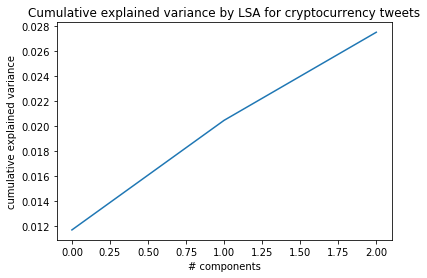

In [143]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by LSA for cryptocurrency tweets');

In [144]:
cryptocurrency.head()

,_id,lang,text,user
5,5cddd6d6fc4f0d82a2c73e46,en,x123456789.eth was just migrated to the new re...,"{'id': 859350218416029696, 'id_str': '85935021..."
8,5cddd6d7fc4f0d82a2c73e49,en,@MYOFFICES @G0JlRA @binance @cz_binance Yeah w...,"{'id': 1067420633615802369, 'id_str': '1067420..."
11,5cddd6d7fc4f0d82a2c73e4c,en,@social77media How about that. I am not knowle...,"{'id': 95009868, 'id_str': '95009868', 'name':..."
12,5cddd6d7fc4f0d82a2c73e4d,en,y123456789.eth was just migrated to the new re...,"{'id': 859350218416029696, 'id_str': '85935021..."
13,5cddd6d7fc4f0d82a2c73e4e,en,Bitcoin [BTC] short worth $84 million closed o...,"{'id': 1020638087242645504, 'id_str': '1020638..."


In [145]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [146]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(tweet) for tweet in cryptocurrency.text]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [147]:
# sentiment statistics per news category
df = pd.DataFrame([list(cryptocurrency['lang']), sentiment_scores, sentiment_category]).T
df.columns = ['lang', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['lang']).describe()

sentiment_score                                               
               count      mean       std   min  25%  50%  75%   max
lang                                                               
en           32148.0  0.700386  2.107747 -14.0  0.0  0.0  2.0  17.0

In [148]:
import seaborn as sns

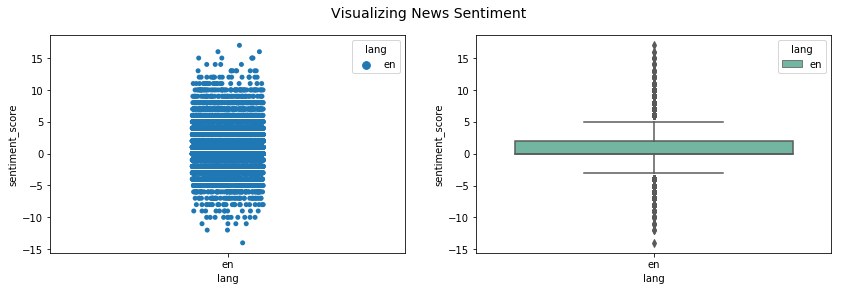

In [149]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='lang', y="sentiment_score", 
                   hue='lang', data=df, ax=ax1)
bp = sns.boxplot(x='lang', y="sentiment_score", 
                 hue='lang', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

In [150]:
df.sort_values("sentiment_score", ascending=True).head()

,lang,sentiment_score,sentiment_category
12554,en,-14.0,negative
26593,en,-12.0,negative
29362,en,-12.0,negative
543,en,-11.0,negative
25357,en,-11.0,negative


In [151]:
cryptocurrency.head()

,_id,lang,text,user
5,5cddd6d6fc4f0d82a2c73e46,en,x123456789.eth was just migrated to the new re...,"{'id': 859350218416029696, 'id_str': '85935021..."
8,5cddd6d7fc4f0d82a2c73e49,en,@MYOFFICES @G0JlRA @binance @cz_binance Yeah w...,"{'id': 1067420633615802369, 'id_str': '1067420..."
11,5cddd6d7fc4f0d82a2c73e4c,en,@social77media How about that. I am not knowle...,"{'id': 95009868, 'id_str': '95009868', 'name':..."
12,5cddd6d7fc4f0d82a2c73e4d,en,y123456789.eth was just migrated to the new re...,"{'id': 859350218416029696, 'id_str': '85935021..."
13,5cddd6d7fc4f0d82a2c73e4e,en,Bitcoin [BTC] short worth $84 million closed o...,"{'id': 1020638087242645504, 'id_str': '1020638..."


In [152]:
pos_idx = df[(df.sentiment_score == 17)].index[0]
neg_idx = df[(df.sentiment_score == -12)].index[0]

print('Most Negative Tech News Article:', cryptocurrency.iloc[neg_idx][['text']][0])
print()
print('Most Positive Tech News Article:', cryptocurrency.iloc[pos_idx][['text']][0])

Most Negative Tech News Article: https://t.co/i5bAqwAPuS
There’s always FUD! FUD everywhere! Craig Wright is a FUD. But 60 minutes wasn’t so bad.… https://t.co/9RTH4J9NIJ

Most Positive Tech News Article: Wow..its amazing.. Miracle tele is true,and nice https://t.co/lWTJYQUykY #Miracletele, #Cryptocurrency, #teletoken, #blockchain


/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


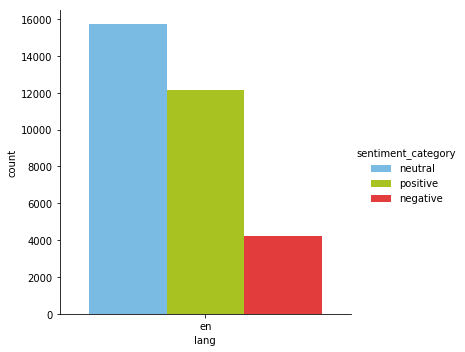

In [153]:
fc = sns.factorplot(x="lang", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [154]:
len(df)

32148

In [155]:
df = df.drop(df.index[df.sentiment_category == 'neutral'])
len(df)

16430

/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


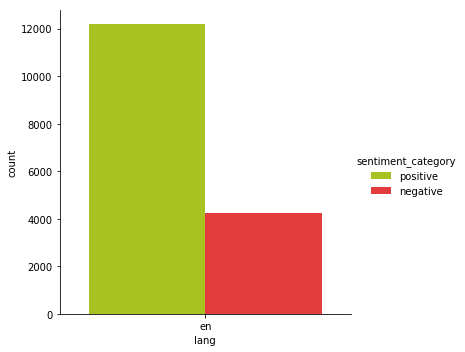

In [161]:
fc = sns.factorplot(x="lang", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"positive": "#BADD07", 
                             "negative": "#FE2020"})

fc.set_titles("Title")